In [1]:
pip install pycaret

In [10]:
import pandas as pd
import numpy as np

data =pd.read_csv(r'C:\Users\himanshu.s\Desktop\Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
# init setup**
from pycaret.classification import *
s = setup(data, target = 'Converted', ignore_features = ['Prospect ID', 'Lead Number'])

,Description,Value
0,Session id,6615
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(9240, 37)"
4,Transformed data shape,"(9240, 135)"
5,Transformed train set shape,"(6468, 135)"
6,Transformed test set shape,"(2772, 135)"
7,Ignore features,2
8,Numeric features,5
9,Categorical features,29


In [14]:
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9375,0.9797,0.9238,0.9150,0.9192,0.8683,0.8685,0.3850
xgboost,Extreme Gradient Boosting,0.9334,0.9786,0.9101,0.9164,0.9131,0.8591,0.8593,0.2620
gbc,Gradient Boosting Classifier,0.9329,0.9785,0.9105,0.9151,0.9127,0.8582,0.8583,0.4470
rf,Random Forest Classifier,0.9354,0.9758,0.9041,0.9266,0.9151,0.8629,0.8633,0.3480
ada,Ada Boost Classifier,0.9232,0.9728,0.8929,0.9065,0.8994,0.8373,0.8376,0.3300
lr,Logistic Regression,0.9232,0.9725,0.8897,0.9090,0.8991,0.8371,0.8374,3.0680
et,Extra Trees Classifier,0.9280,0.9716,0.8913,0.9193,0.9049,0.8470,0.8474,0.3510
ridge,Ridge Classifier,0.9182,0.9702,0.8664,0.9169,0.8908,0.8255,0.8266,0.2050
lda,Linear Discriminant Analysis,0.9181,0.9700,0.8664,0.9165,0.8906,0.8252,0.8262,0.2190
dt,Decision Tree Classifier,0.9106,0.9071,0.8873,0.8816,0.8844,0.8116,0.8116,0.1990


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [15]:
# Print specific parameters of the best model
print(f"Learning rate: {best_model.learning_rate}")
print(f"Number of estimators: {best_model.n_estimators}")
print(f"Maximum depth: {best_model.max_depth}")

Learning rate: 0.1
Number of estimators: 100
Maximum depth: -1


In [16]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6615, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


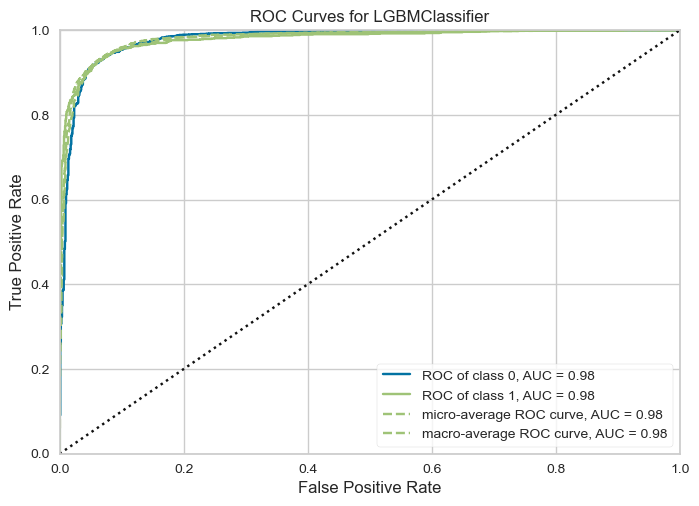

In [17]:
plot_model(best_model, plot = 'auc')

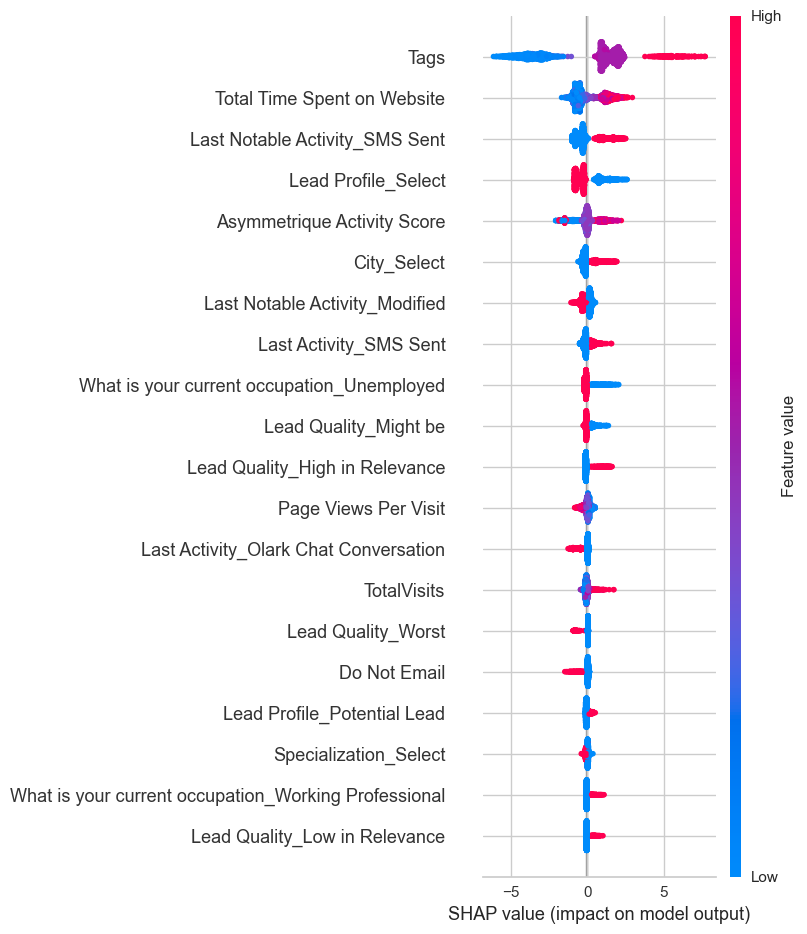

In [18]:
# Shapley Values**
interpret_model(best_model)

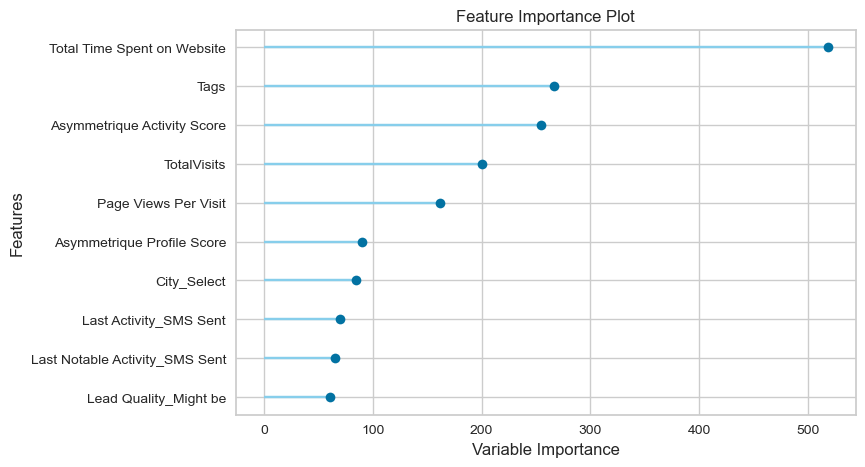

In [19]:
# Feature Importance
plot_model(best_model, plot = 'feature')

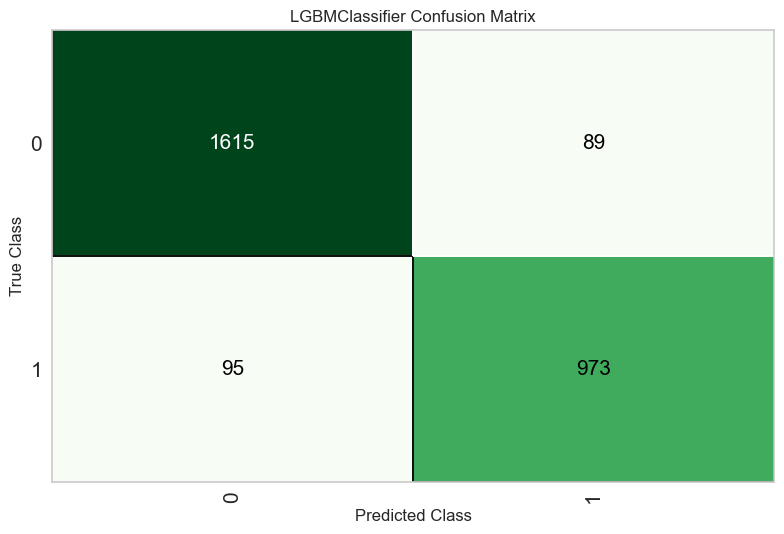

In [20]:
# Confusion Matrix 
plot_model(best_model, plot = 'confusion_matrix')

## How to use the model to generate a lead score?

In [21]:
# create copy of data
data_new = data.copy()
data_new.drop('Converted', axis=1, inplace=True)

In [22]:
# generate labels using predict_model
predict_model(best_model, data=data_new, raw_score=True)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,prediction_label,prediction_score_0,prediction_score_1
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.00,Page Visited on Website,...,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,0.9987,0.0013
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.50,Email Opened,...,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,0.9835,0.0165
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.00,Email Opened,...,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,0.0035,0.9965
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.00,Unreachable,...,02.Medium,01.High,13.0,17.0,No,No,Modified,0,0.9936,0.0064
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.00,Converted to Lead,...,02.Medium,01.High,15.0,18.0,No,No,Modified,0,0.7620,0.2380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,8.0,1845,2.67,Email Marked Spam,...,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam,1,0.0062,0.9938
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,2.0,238,2.00,SMS Sent,...,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent,0,0.9905,0.0095
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,2.0,199,2.00,SMS Sent,...,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent,0,0.9984,0.0016
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,3.0,499,3.00,SMS Sent,...,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent,1,0.0175,0.9825


## Save Model

In [ ]:
# save_model(best_model, model_name='best_model')

In [ ]:
loaded_bestmodel = load_model('best_model')
print(loaded_bestmodel)